## Description:

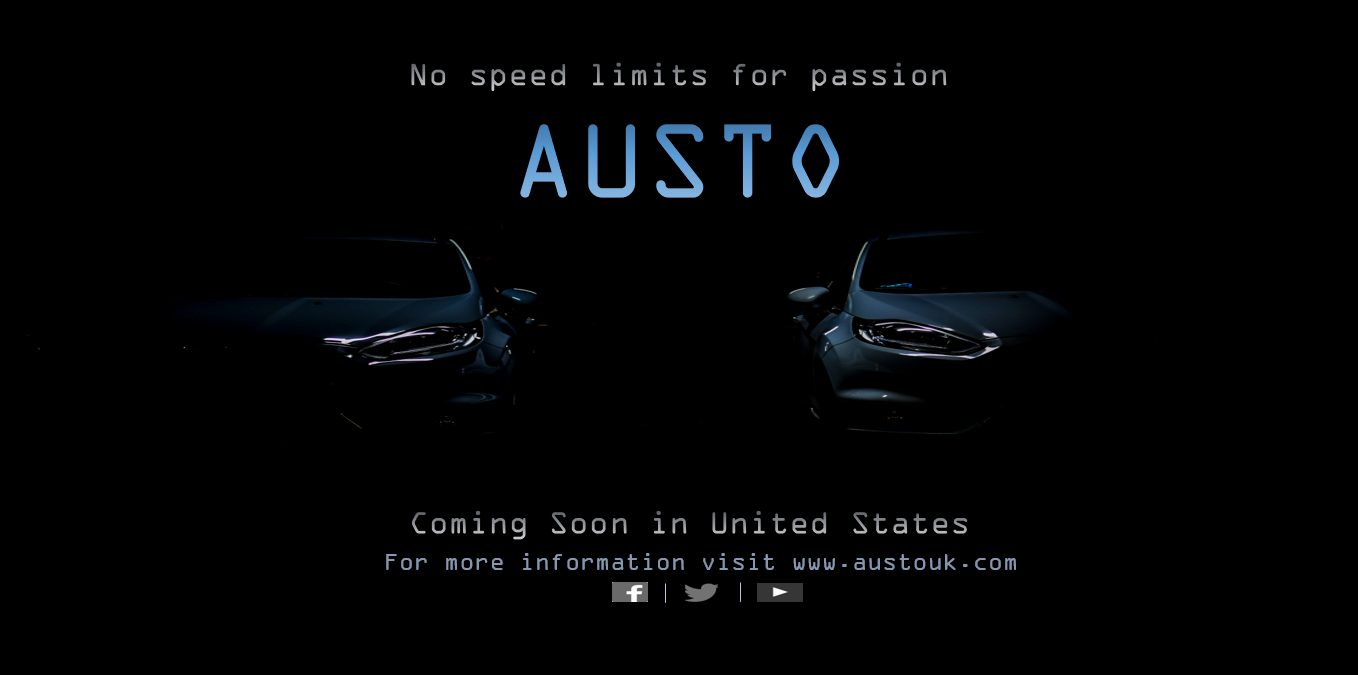

### Context 
In the 21st century, cars are an important mode of transportation that provides us the opportunity for
personal control and autonomy. In day-to-day life, people use cars for commuting to work, shopping,
visiting family and friends, etc. Research shows that more than 76% of people prevent themselves
from traveling somewhere if they don't have a car. Most people tend to buy different types of cars
based on their day-to-day necessities and preferences. So, it is essential for automobile companies
to analyze the preference of their customers before launching a car model into the market. Austo, a
UK-based automobile company aspires to grow its business into the US market after successfully
establishing its footprints in the European market.
In order to be familiar with the types of cars preferred by the customers and factors influencing the
car purchase behavior in the US market, Austo has contracted a consulting firm. Based on various
market surveys, the consulting firm has created a dataset of 3 major types of cars that are
extensively used across the US market. They have collected various details of the car owners which
can be analyzed to understand the automobile market of the US. 

### Objective 
Austo’s management team wants to understand the demand of the buyers and trends in the US
market. They want to build customer profiles based on the analysis to identify new purchase
opportunities so that they can manipulate the business strategy and production to meet certain
demand levels. Further, the analysis will be a good way for management to understand the
dynamics of a new market. Suppose you are a Data Scientist working at the consulting firm that has
been contracted by Austo. You are given the task to create buyer’s profiles for different types of cars
with the available data as well as a set of recommendations for Austo. Perform the data analysis to
generate useful insights that will help the automobile company to grow its business. 


### Data Description: 
austo_automobile.csv: The dataset contains buyer’s data corresponding to different types of
products(cars).

### Data Dictionary
- Age: Age of the customer
- Gender: Gender of the customer
- Profession: Indicates whether the customer is a salaried or business person
- Marital_status: Marital status of the customer
- Education: Refers to the highest level of education completed by the customer
- No_of_dependents: Number of dependents(partner/children/spouse) of the customer
- Personal_loan: Indicates whether the customer availed a personal loan or not
- House_loan: Indicates whether the customer availed house loan or not
- Partner_working: Indicates whether the customer's partner is working or not
- Salary: Annual Salary of the customer
- Partner_salary: Annual Salary of the customer's partner
- Total_salary: Annual household income (Salary + Partner_salary) of the customer's family
- Price: Price of the car
- Make: Car type (Hatchback/Sedan/SUV)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sb

# importing the package to use for the visualization
from utils import histogram_boxplot, labeled_barplot

path = r"C:\Users\User\Desktop\Alied Tech\Project\Raw Data\austo_automobile.csv"

df = pd.read_csv(path)

- The necessary libraries were imported.
- Then the data was loaded.

In [5]:
data = df.copy()

- Making a duplicate of the data, so that the original data will be intact for subsequent use. 

### Exploring The Data (Exploratory Data Analysis, EDA)

In [4]:
data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,24,Male,Salaried,Married,Post Graduate,4,No,Yes,Yes,52000,25000,77000,18000,Hatchback
1,28,Male,Salaried,Married,Post Graduate,3,No,Yes,No,68000,0,68000,18000,Hatchback
2,23,Male,Salaried,Married,Graduate,4,Yes,Yes,No,31000,0,31000,18000,Hatchback
3,26,Male,Business,Married,Post Graduate,4,Yes,Yes,Yes,66000,35000,101000,18000,Hatchback
4,28,Male,Business,Married,Post Graduate,4,Yes,No,No,64000,0,64000,18000,Hatchback


In [5]:
data.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,28,Male,Salaried,Married,Post Graduate,2,Yes,No,No,72000,0,72000,33000,Hatchback
1577,23,Male,Salaried,Single,Graduate,2,Yes,Yes,No,37000,0,37000,33000,Hatchback
1578,23,Male,Business,Married,Graduate,4,Yes,Yes,Yes,38000,28000,66000,33000,Hatchback
1579,25,Male,Business,Married,Post Graduate,3,Yes,Yes,Yes,58000,40000,98000,33000,Hatchback
1580,28,Male,Salaried,Married,Graduate,4,No,Yes,Yes,54000,40000,94000,33000,Hatchback


- Getting an overview of the first and last five rows of the data.
- For the purpose of this project, the "Make: Car type (Hatchback/Sedan/SUV)" will be the target.

In [7]:
data.sample(5)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
916,44,Male,Business,Single,Post Graduate,2,No,No,No,82000,0,82000,44000,Sedan
421,57,Male,Business,Married,Post Graduate,3,No,No,Yes,79000,40000,119000,56000,SUV
1540,36,Male,Salaried,Married,Post Graduate,4,No,No,Yes,66000,40000,106000,69000,SUV
632,23,Male,Salaried,Married,Post Graduate,2,No,No,No,57000,0,57000,24000,Hatchback
1414,27,Male,Salaried,Married,Post Graduate,3,Yes,Yes,No,66000,0,66000,32000,Hatchback


- Getting random sampling of five rows of the data at various intervals.

In [8]:
data.shape

(1581, 14)

- The data has 1581 rows and 14 columns.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1581 non-null   int64 
 1   Gender            1581 non-null   object
 2   Profession        1581 non-null   object
 3   Marital_status    1581 non-null   object
 4   Education         1581 non-null   object
 5   No_of_Dependents  1581 non-null   int64 
 6   Personal_loan     1581 non-null   object
 7   House_loan        1581 non-null   object
 8   Partner_working   1581 non-null   object
 9   Salary            1581 non-null   int64 
 10  Partner_salary    1581 non-null   int64 
 11  Total_salary      1581 non-null   int64 
 12  Price             1581 non-null   int64 
 13  Make              1581 non-null   object
dtypes: int64(6), object(8)
memory usage: 173.0+ KB


- The columns in the data consist of two different datatypes such as strings or objects (eight in total) and integers (six in number).

- There are no missing values in the data.


In [10]:
data.duplicated().sum()

0

- The data do not have duplicates.

In [11]:
data.isna().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

- All columns in the data have no missing values.

In [12]:
data.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

- There are no empty strings (null values) in the data.

In [14]:
"""Getting the statistical summary or overview of the entire data (numerical and categorical), and then transpose it"""

data.describe(include= "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,32.211259,9.125477,22.0,25.0,29.0,38.0,60.0
Gender,1581,2,Male,1252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,NaN,NaN,NaN,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,59732.447818,14278.642665,30000.0,51000.0,59000.0,71000.0,90000.0


- Hatchback has the highest frequency regarding car types.
- The most expensive car in this data-set cost $158,000.

- The highest salary earner gets $90,000 annually. 

- While the lowest salary earner gets $30,000 per annum.

- Majority of the customers are male, married, salary earners, their partners are working, do not avail house and have completed a post graduate educaion.
- Most of the customers have outstanding personal loans.

### Data Cleaning and Preprocessing

- The data is already clean, so there is no need for further cleaning.

# Data Visualization

## Univariate Analysis

#### Numerical Varibles

Histoplot is used for numerical (discret and continuous) variables but more suitable for continuous numerical variable.

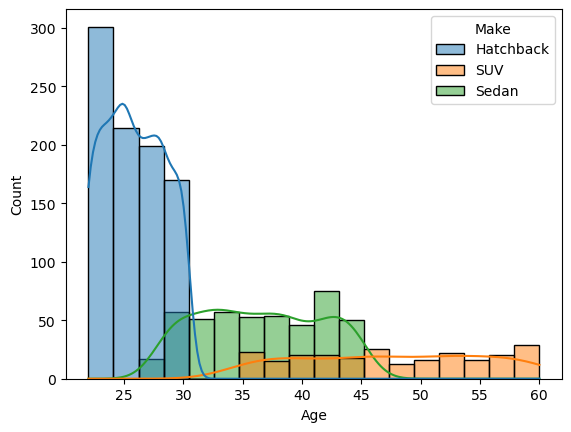

<Figure size 600x400 with 0 Axes>

In [86]:
sb.histplot(data=data, x="Age", kde=True, color="purple", hue= "Make")
mpl.figure(figsize=(6,4));

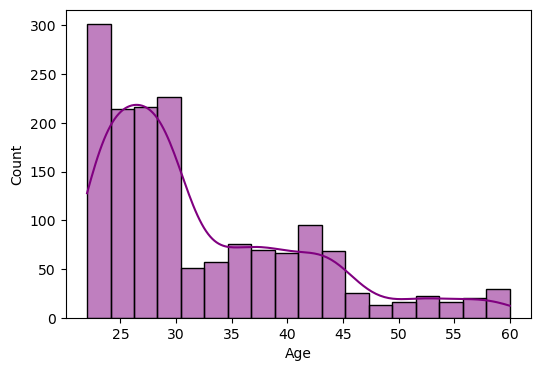

In [84]:
mpl.figure(figsize= (6,4))
sb.histplot(data= data, x = "Age", kde= True, color="purple");

- Majority of the customers are between 21 to 30 years old.

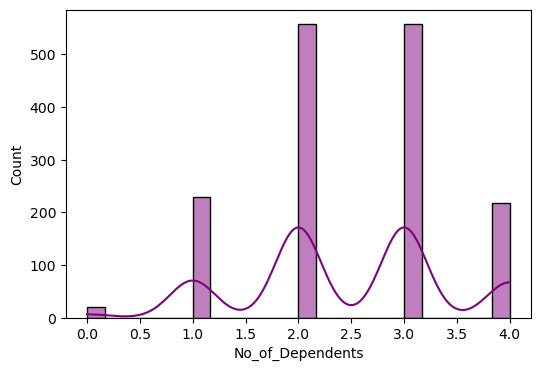

In [88]:
mpl.figure(figsize= (6,4))
sb.histplot(data= data, x = "No_of_Dependents", kde= True, color= "purple");

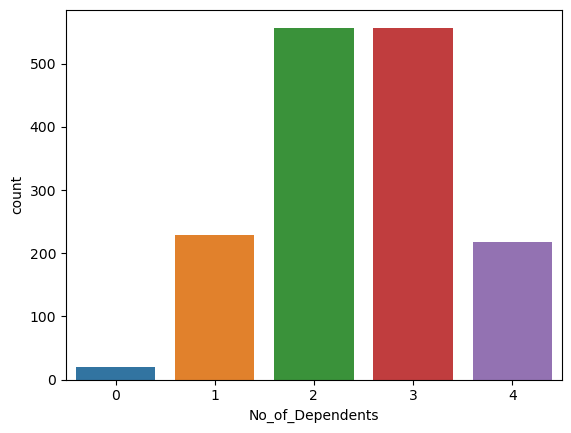

In [90]:
# The "No_of_Dependents" is a discret numeric variable, so it can also be treated as a categorical variable.

sb.countplot(data= data, x= "No_of_Dependents")

mpl.show()

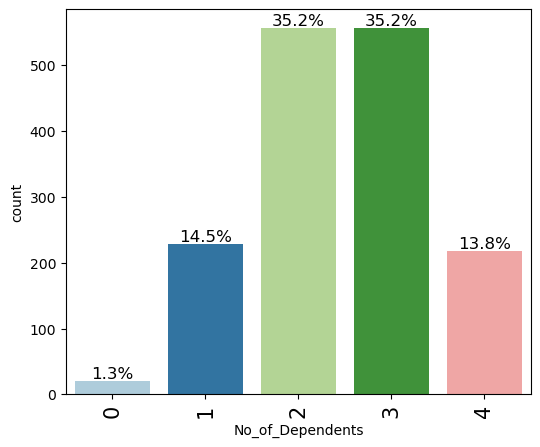

In [18]:
labeled_barplot(data= data, feature= "No_of_Dependents", perc=True)

- Most of the customers have 3 or 4 dependents, few of the customers have no dependents.

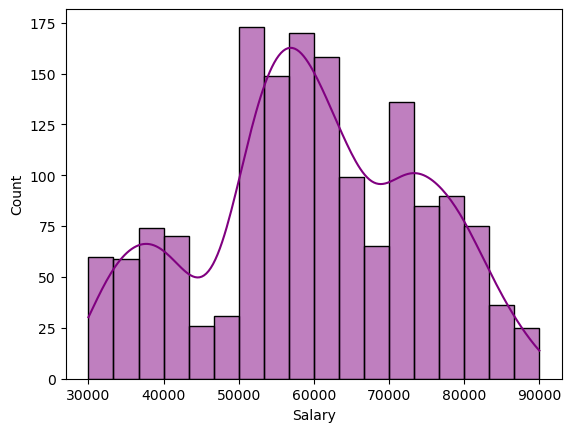

In [29]:
sb.histplot(data= data, x= "Salary", kde= True, color= "purple")
mpl.show()

- Majority of the customers earn between 50,000 US dollars and $70,000 annually.

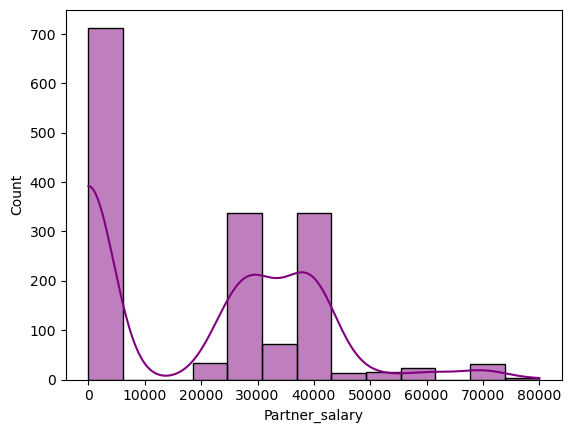

In [31]:
sb.histplot(data= data, x= "Partner_salary", kde= True, color= "purple")
mpl.show()

- Majority of the customer's partners do not earn, while others earn mainly between $30,000 to 40,000 US dollars annually.

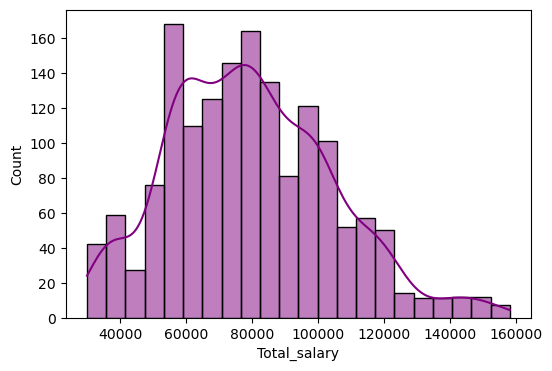

In [6]:
mpl.figure(figsize= (6,4))
sb.histplot(data= data, x = "Total_salary", kde= True, color= "purple");

- Majority of the customers have a "Total_salary" or annual household income (Salary + Partner_salary) between 60,000 US dollars and 100,000 US dollars.

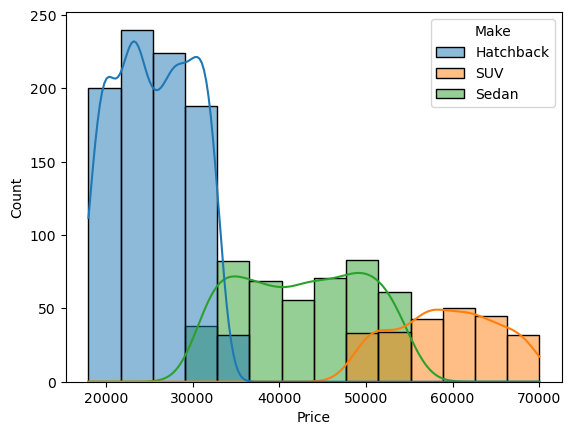

In [91]:
sb.histplot(data= data, x= "Price", kde= True, color="purple", hue= "Make");

- The "Price" for most of the cars is between 20,000 to 30,000 US dollars.

### Categorical Variables

Bar chart is used for a single categorical variable. Examples of this are count plots and bar plots.

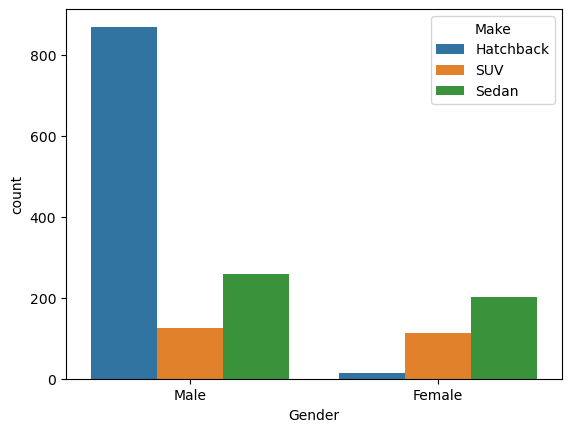

In [92]:
sb.countplot(data=data, x="Gender", hue= "Make");

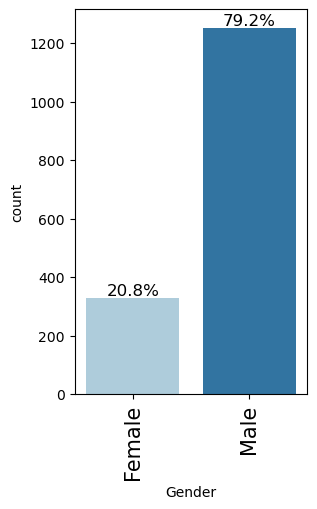

In [70]:
labeled_barplot(data= data, feature= "Gender", perc= True)

- Most of the customers (79.2%) are male.

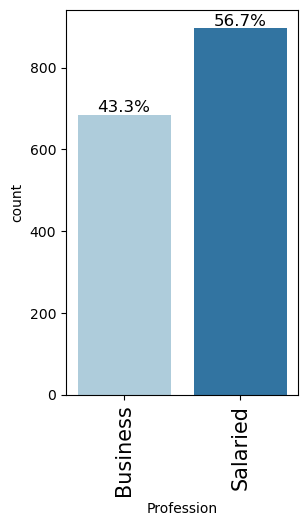

In [27]:

labeled_barplot(data= data, feature= "Profession", perc= True)

- Most of the customers (precisely 56.7%) are salary earners.

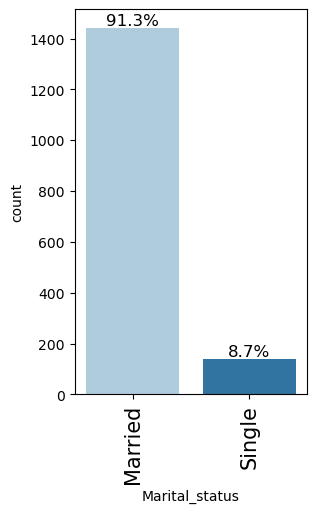

In [29]:
labeled_barplot(data= data, feature= "Marital_status", perc= True)

- Majority of the customers (91.3%) are married. 

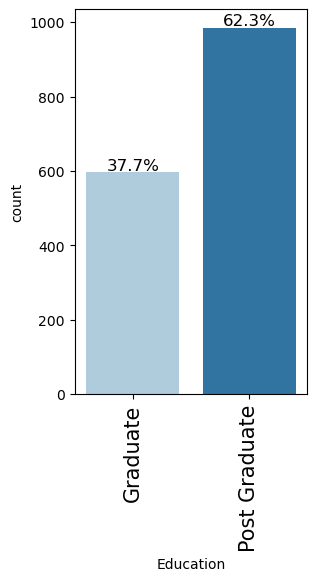

In [32]:
labeled_barplot(data= data, feature= "Education", perc= True)

- Majority of the customers (62.3%) have attained a post graduate education.

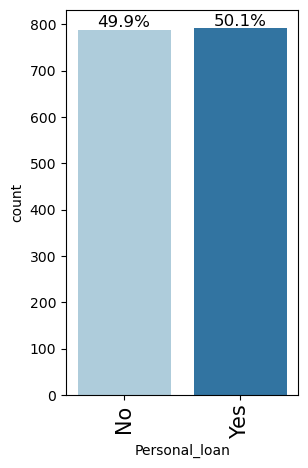

In [34]:
labeled_barplot(data= data, feature= "Personal_loan", perc= True)

- About half (50.1%) of the customers have outstanding personal loan.

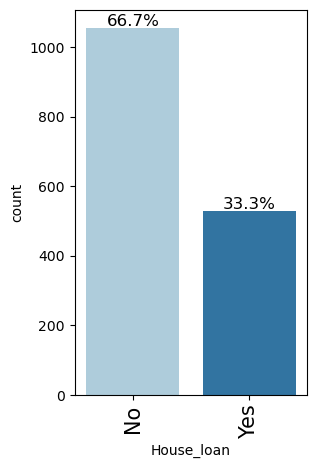

In [35]:
labeled_barplot(data= data, feature= "House_loan", perc= True)

- Most of the customers (66.7%) do not have outstanding house loan. Only 33.3% of the customers have outstanding house loan.

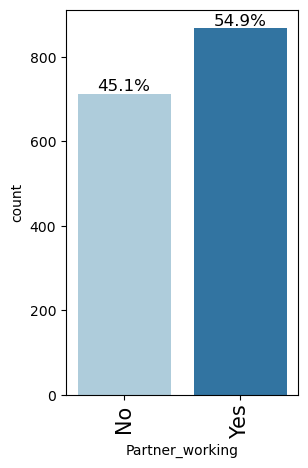

In [36]:
labeled_barplot(data=data, feature="Partner_working", perc= True,)

- The partners (spouse) of 54.9% of the customers are working.

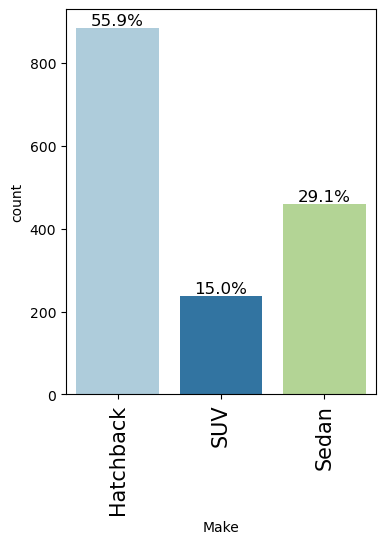

In [38]:
labeled_barplot(data=data, feature="Make", perc=True)

- Most customers prefer using Hatchback cars (55.9%) than Sedan (29.1%) cars. SUV which has just 15% of the total count, is the least used cars by the customers.

## Bivariate Analysis

- This is used to explore the relationship (positive, negative or none) between two variables, most especially between the targets and other variables.
- For the sake of this project, the "Price" of the cars will be the target.

In [39]:
data_corr = data.corr()

data_corr

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
Age,1.000000,-0.157163,0.606094,0.150202,0.465891,0.790466
No_of_Dependents,-0.157163,1.000000,-0.043847,0.144508,0.088067,-0.135839
Salary,0.606094,-0.043847,1.000000,0.061943,0.623003,0.393038
Partner_salary,0.150202,0.144508,0.061943,1.000000,0.819309,0.156154
Total_salary,0.465891,0.088067,0.623003,0.819309,1.000000,0.348164
Price,0.790466,-0.135839,0.393038,0.156154,0.348164,1.000000


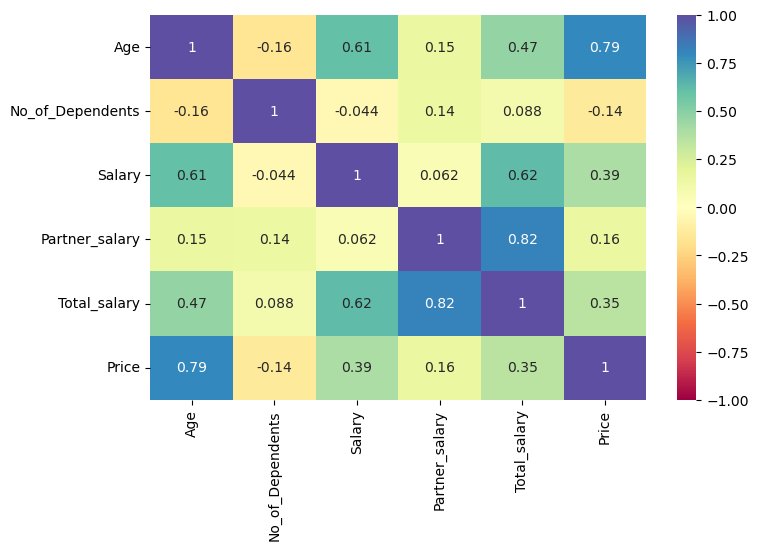

In [40]:
mpl.figure(figsize= (8,5))
sb.heatmap(data_corr, vmax= 1, vmin= -1, annot= True, cmap= "Spectral");


- The data-set has both positive and negative correlation.
- Most of the variables have high correlation with each other. For example, "Salary" and "Age".
- The target "Price of a car" has positive correlation with most of the variables, except for the "No_of_Dependents" where it has negative correlation, which means that as the number of dependent increases, the cheaper the price of car the customers buy.

## Scattered Plot

- This is used for two numerical variables.

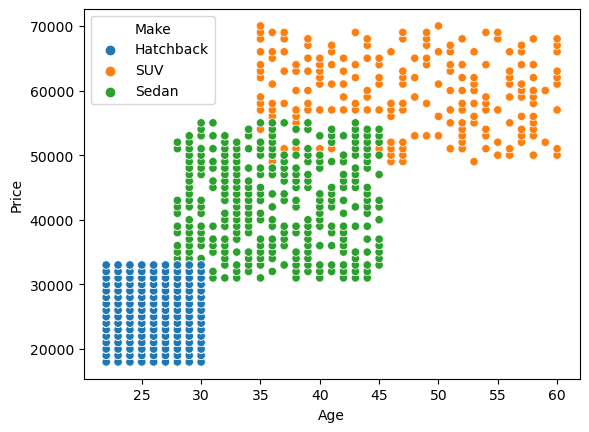

In [71]:
sb.scatterplot(data= data, y = "Price", x="Age", hue= "Make");

- As the Ages of the customers increase, the prices of the cars they buy increase.
- The most expensive cars were bought by customers between 35-60 years of age.

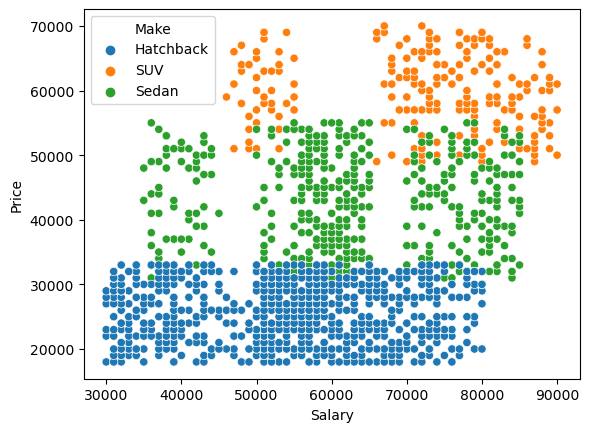

In [73]:
sb.scatterplot(data=data, y="Price", x= "Salary", hue= "Make");

- As the annual "Salary" of a customer increases, there is an increase in the "Price" of car he/she buys.
- Customers who receive annual salary above $45,000 tend to buy more expensive cars.

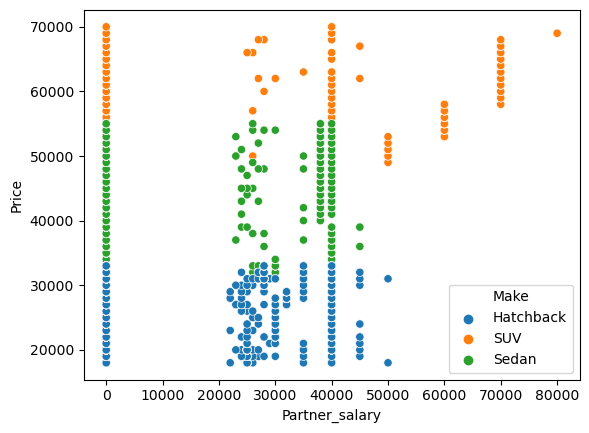

In [74]:
sb.scatterplot(data=data, y="Price", x= "Partner_salary", hue= "Make");

- Increase or changes in the annual salary of a customer's spouse or partner (Partner_salary), had no significant effect (increase or changes) in the price of the car a customer buys.

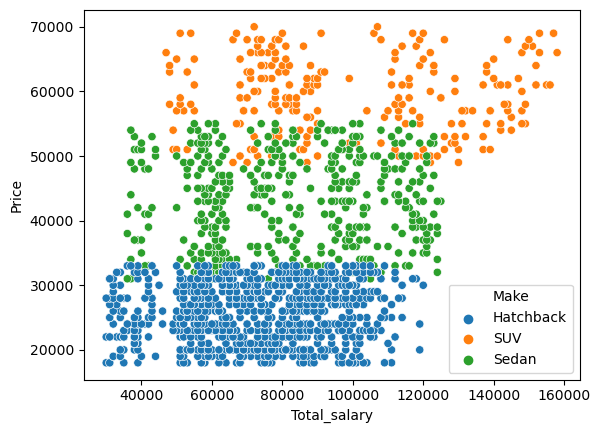

In [75]:
sb.scatterplot(data=data, y="Price", x= "Total_salary", hue= "Make");

- As the "Total_salary" (annual household income or Salary + Partner_salary) of a customer increases, there is an increase in the "Price" of car the customer buys.
- Customers whose annual family income is above $50,000 tend to buy more expensive cars. This trend is similar to what is seen from the salary-price plot, which means that the actual salary of the customer is the major determinant here.

## Categorical Plots

- Used for bivariate plots in which one of the variable is numerical (preferably the target) and the other is categorical (object type).

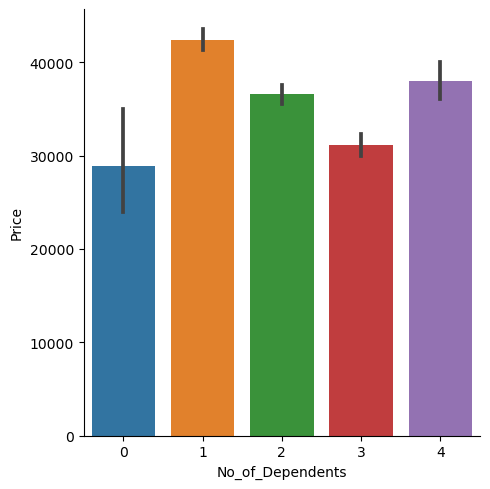

In [77]:
sb.catplot(data= data, y="Price", x="No_of_Dependents", kind= "bar");

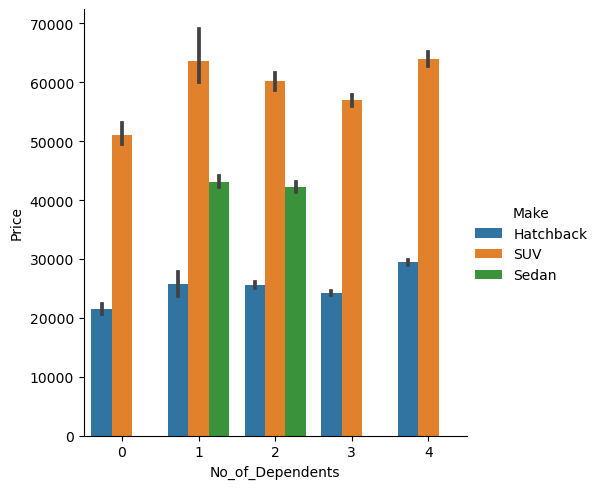

In [76]:
sb.catplot(data= data, y="Price", x="No_of_Dependents", kind= "bar", hue= "Make");

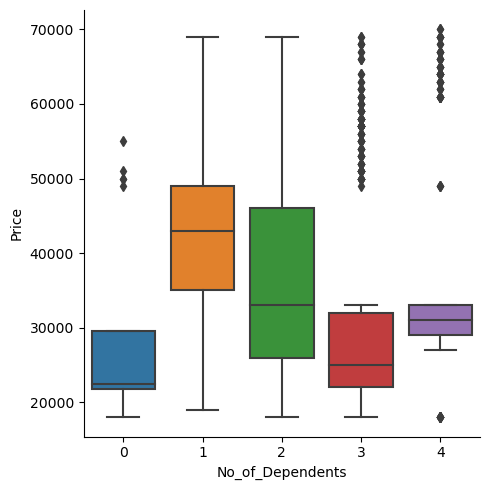

In [50]:
sb.catplot(data= data, y="Price", x="No_of_Dependents", kind= "box");

- Majority of the customers who bought the most expensive cars have just one dependent.
- As the number of dependents increases, the price of car bought by a customer reduces. Although, there are outliers where the number of dependents is zero, three and four.

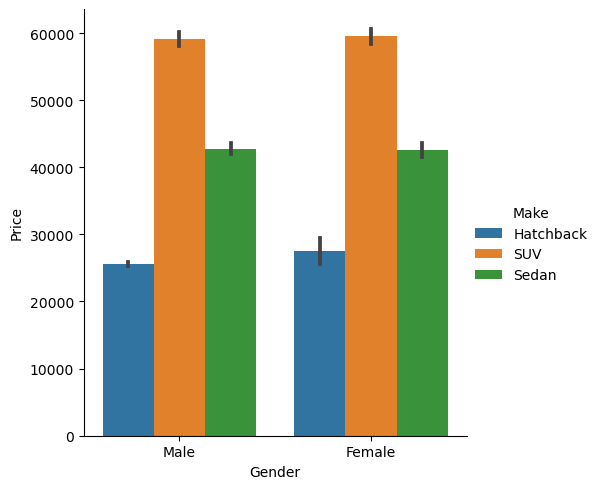

In [83]:
sb.catplot(data=data, y="Price", x="Gender", hue= "Make", kind= "bar");

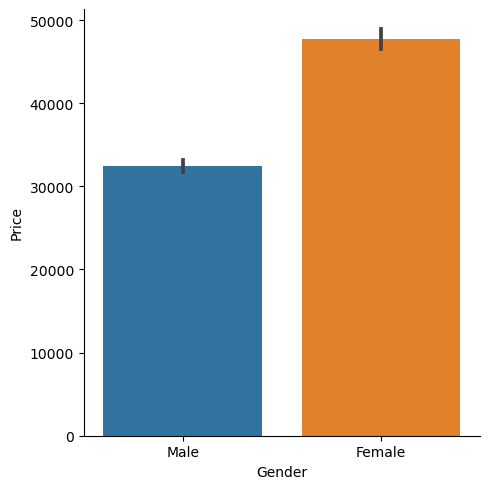

In [79]:
sb.catplot(data= data, y = "Price", x = "Gender", kind= "bar");


- Although the count plot shows that male bought more cars than female, however females tend to buy more expensive cars than male.

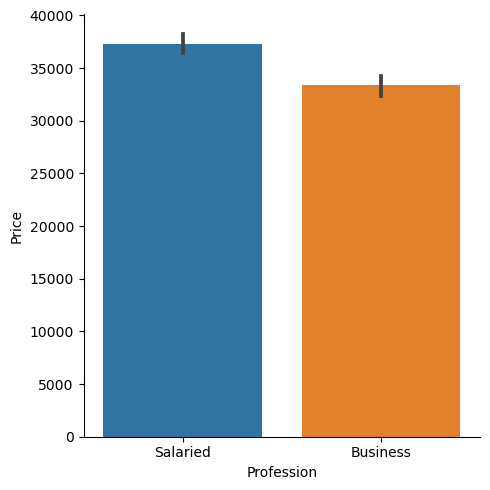

In [62]:
sb.catplot(data= data, y = "Price", x = "Profession", kind= "bar");

- People who are salary earners (Salaried) buy more expensive cars than business owners.

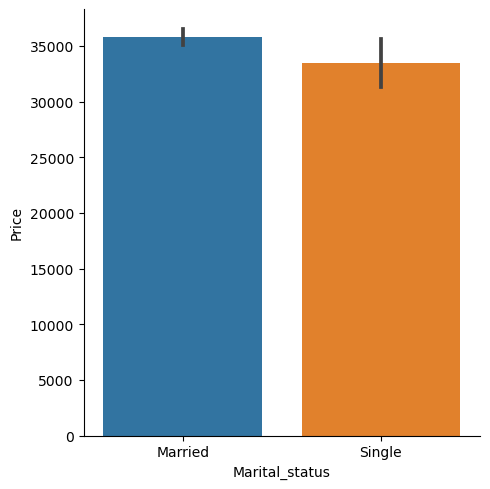

In [65]:
sb.catplot(data= data, y = "Price", x = "Marital_status", kind= "bar");

- Married people buy more expensive cars than singles (unmarried people).

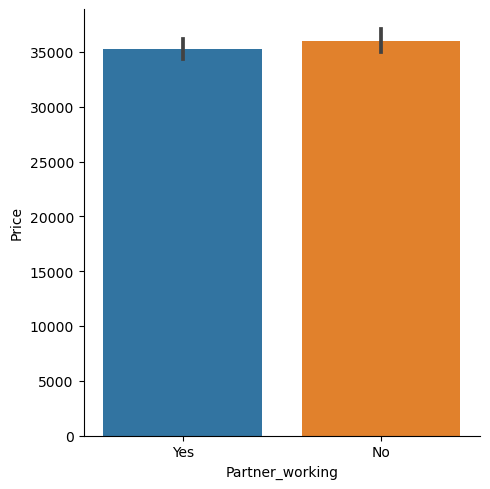

In [64]:
sb.catplot(data= data, y = "Price", x = "Partner_working", kind= "bar");

- People whose spouses or partners do no work tends to buy more expensive cars than those whose partners are working. Although the difference is a little margin.

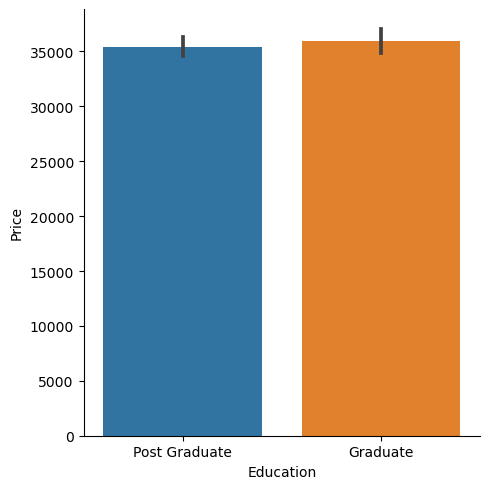

In [66]:
sb.catplot(data= data, y = "Price", x = "Education", kind= "bar");

- There is no much difference between the education levels of those whose buy expensive cars from those who do not. However, people who have obtained just a graduate education seem to buy more expensive cars than those with post graduate education.

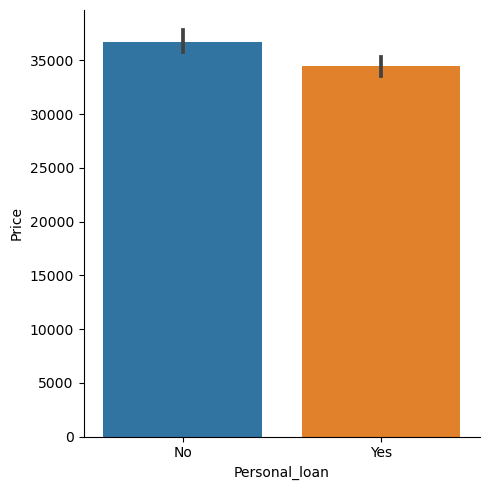

In [67]:
sb.catplot(data= data, y = "Price", x = "Personal_loan", kind= "bar");

- People who do not have outstanding personal loan, buy more cars of higher price than those who have personal loans to pay.

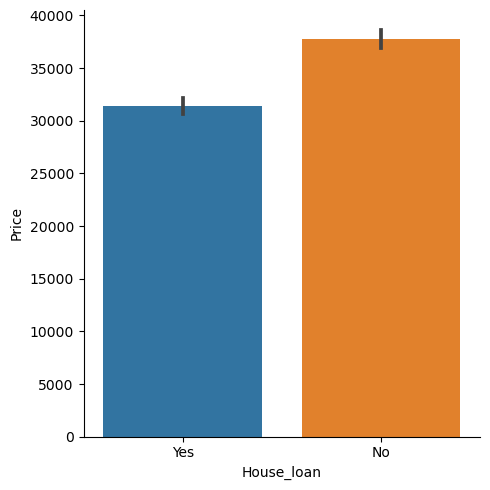

In [69]:
sb.catplot(data= data, y = "Price", x = "House_loan", kind= "bar");

- Just like in the case of personal loan, customers who do not have house loan, buy more expensive cars than those who have outstanding house loan.

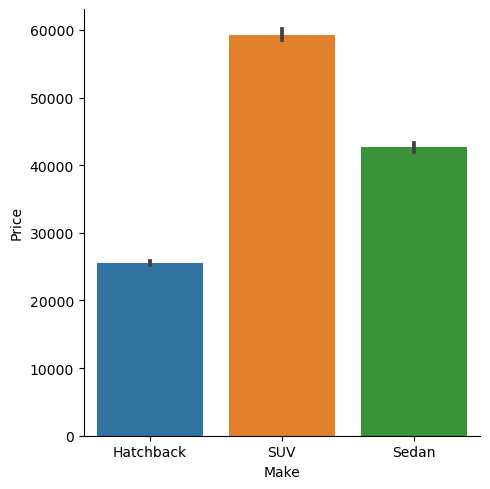

In [63]:
sb.catplot(data= data, y = "Price", x = "Make", kind= "bar");

- SUV sells at a much higher price than the other types of cars (Hatchback and Sedan).

# Suggestions and/or Recommendations:

- Autos-Auto should focus more on SUV cars even when it seems that people buy more of Hatchback, which could be due to the low cost of Hatchback cars in the US.

- Irrespective of the fact that in general, males bought more cars than females, the company should put more emphasis on females as their prospective customers because females bought more expensive cars than males.

* The company should concentrate implicitly or more on these category of people as their potential customers:
    - Average aged people, preferably between 35-60 years of age.
    - Married people.
    - People with lesser number of dependents.
    - Salary earners rather than business owners.
    - Additionally to being a salary earner, those with higher salaries per annum. For example, people who receive annual
    salary of $45,000 and above.
    - Those whose family annual household income (Salary + Partner_salary) is high. For instance, a minimum of 50,000 US
    dollars.
    - Customers who do not have outstanding house loan and/or personal loan.
